<a href="https://colab.research.google.com/github/svfabi/Fabiano/blob/master/SimulacaoFuncaoRelacaoprodutoSoma_SomaProdutoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

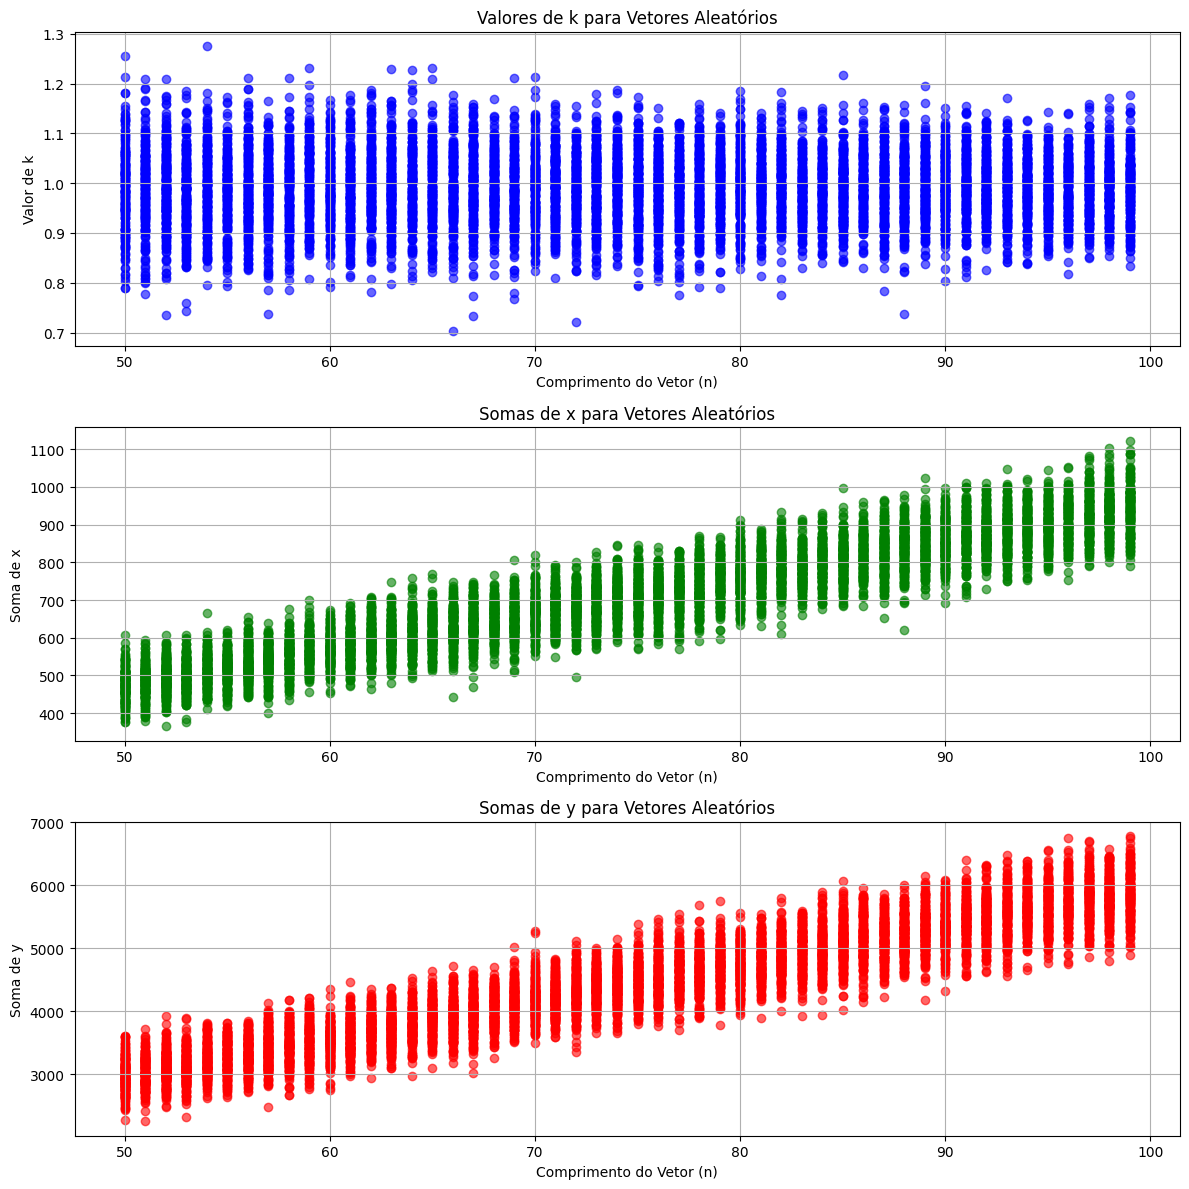

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# codigo para encontrar  uma função que aproxime valores de sumxy de sumxsumy
# gera vetores de tamanhos e valores aleatorios e verica o valor de K
# k proximos de 1 a função é a melhor para representar a aproximação
# da função para todos os valores de comprimento de vetor e seus valores xi e yi

def calcular_k(x, y):
    n = len(x)
    #eqc1 = ((0.01 * n) ** n) # This calculation is causing the overflow error,
    # and it is not being used in the code. It can be removed.

    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)

    a = 9.6 # valor estimado para o meu caso especifico
    ar = sum_x/n # com este valor de a não pode ter variação de K

    k = (sum_x * sum_y) / (sum_xy + n*a*(sum_y-sum_y/n))  # Ajuste na fórmula de k
   # print(ar)
    return k, sum_x, sum_y

# Gerar vetores aleatórios e calcular k
n_vetores = 10000 #numero maximo de vetores gerados aleatoriamente
n_Inicial = 50     # tamanho do vetor inicial para gerar vetores aleatorios
n_Len_Vetor = 100  #comprimento maximo do vetor gerado aleatoriamente
n_Valoresx = 20 # numero maximo dos valores de xi
n_Valoresy = 120 # numero maximo dos valores de yi

comprimentos = np.random.randint(n_Inicial, n_Len_Vetor, n_vetores)
ks = []
somas_x = []
somas_y = []

for n in comprimentos:
    x = np.random.randint(0, n_Valoresx, n)
    y = np.random.randint(0, n_Valoresy, n)
    k, sum_x, sum_y = calcular_k(x, y)
    ks.append(k)
    somas_x.append(sum_x)
    somas_y.append(sum_y)

# Plotar os resultados
plt.figure(figsize=(12, 12))

# Gráfico de k
plt.subplot(3, 1, 1)
plt.scatter(comprimentos, ks, color='blue', alpha=0.6)
plt.xlabel('Comprimento do Vetor (n)')
plt.ylabel('Valor de k')
plt.title('Valores de k para Vetores Aleatórios')
plt.grid(True)

# Gráfico de somas_x
plt.subplot(3, 1, 2)
plt.scatter(comprimentos, somas_x, color='green', alpha=0.6)
plt.xlabel('Comprimento do Vetor (n)')
plt.ylabel('Soma de x')
plt.title('Somas de x para Vetores Aleatórios')
plt.grid(True)

# Gráfico de somas_y
plt.subplot(3, 1, 3)
plt.scatter(comprimentos, somas_y, color='red', alpha=0.6)
plt.xlabel('Comprimento do Vetor (n)')
plt.ylabel('Soma de y')
plt.title('Somas de y para Vetores Aleatórios')
plt.grid(True)

plt.tight_layout()
plt.show()

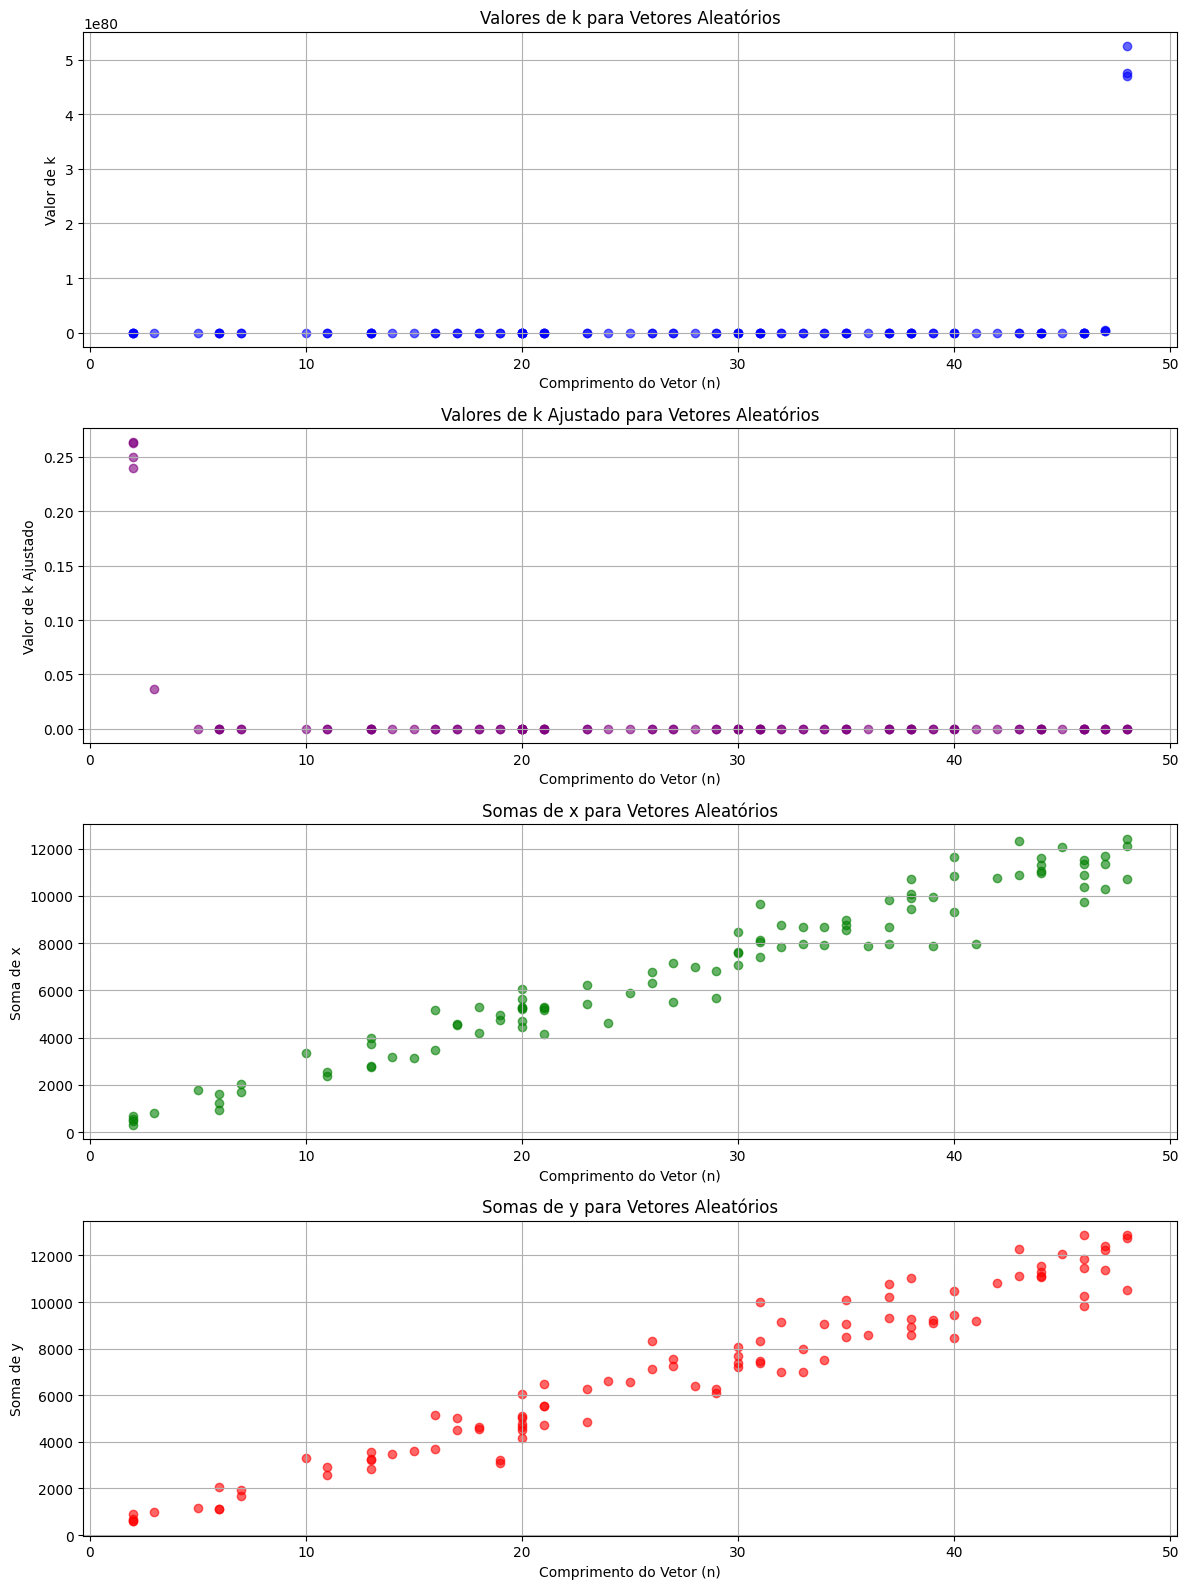

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular k com normalização em função de n
def calcular_k(x, y):
    n = len(x)
    eqc1 = ((0.01 * n) ** n)
    eqc2 = n
    eqc3 = 1 / np.sqrt(n)  # Novo fator de normalização em função de n
    eqc4 = n * n ** -n
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    k = (sum_x * sum_y) / (eqc4 * sum_xy)  # Ajuste na fórmula de k

    return k, sum_x, sum_y, eqc4, sum_xy

# Função para ajustar k
def ajustar_k(sum_x, sum_y, eqc4, sum_xy):
    fator_ajuste = (eqc4 * sum_xy) / (sum_x * sum_y)
    k_ajustado = 1 * fator_ajuste  # Ajuste para tornar k próximo de 1
    return k_ajustado

# Gerar vetores aleatórios e calcular k
n_vetores = 100  # número máximo de vetores gerados aleatoriamente
n_Len_Vetor = 50  # comprimento máximo do vetor gerado aleatoriamente
n_Valores = 500  # número máximo dos valores de xi e yi
comprimentos = np.random.randint(2, n_Len_Vetor, n_vetores)
ks = []
ks_ajustados = []
somas_x = []
somas_y = []

for n in comprimentos:
    x = np.random.randint(0, n_Valores, n)
    y = np.random.randint(0, n_Valores, n)
    k, sum_x, sum_y, eqc4, sum_xy = calcular_k(x, y)
    k_ajustado = ajustar_k(sum_x, sum_y, eqc4, sum_xy)
    ks.append(k)
    ks_ajustados.append(k_ajustado)
    somas_x.append(sum_x)
    somas_y.append(sum_y)

# Plotar os resultados
plt.figure(figsize=(12, 16))

# Gráfico de k
plt.subplot(4, 1, 1)
plt.scatter(comprimentos, ks, color='blue', alpha=0.6)
plt.xlabel('Comprimento do Vetor (n)')
plt.ylabel('Valor de k')
plt.title('Valores de k para Vetores Aleatórios')
plt.grid(True)

# Gráfico de k ajustado
plt.subplot(4, 1, 2)
plt.scatter(comprimentos, ks_ajustados, color='purple', alpha=0.6)
plt.xlabel('Comprimento do Vetor (n)')
plt.ylabel('Valor de k Ajustado')
plt.title('Valores de k Ajustado para Vetores Aleatórios')
plt.grid(True)

# Gráfico de somas_x
plt.subplot(4, 1, 3)
plt.scatter(comprimentos, somas_x, color='green', alpha=0.6)
plt.xlabel('Comprimento do Vetor (n)')
plt.ylabel('Soma de x')
plt.title('Somas de x para Vetores Aleatórios')
plt.grid(True)

# Gráfico de somas_y
plt.subplot(4, 1, 4)
plt.scatter(comprimentos, somas_y, color='red', alpha=0.6)
plt.xlabel('Comprimento do Vetor (n)')
plt.ylabel('Soma de y')
plt.title('Somas de y para Vetores Aleatórios')
plt.grid(True)

plt.tight_layout()
plt.show()
